#TAREA 3 - IVÁN ANDRÉS CÁCERES SATORRES


**PREGUNTA 1 Y PREGUNTA 2**


In [8]:
# Pregunta 1 y Pregunta 2
!pip install kaggle -q
!pip install pandas -q

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

!mkdir ~/.kaggle
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download neuromusic/avocado-prices -f avocado.csv
!unzip avocado.csv.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
avocado.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  avocado.csv.zip
replace avocado.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [9]:
# Cargar los datos
data = pd.read_csv('avocado.csv')

# Crear un nuevo DataFrame con las columnas seleccionadas
selected_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']
new_data = data[selected_columns]

# Codificar la columna 'type' que es categórica
new_data = pd.get_dummies(new_data, columns=['type'])

# Dividir los datos en características (X) y la variable objetivo (y)
X = new_data.drop(['AveragePrice'], axis=1)
y = new_data['AveragePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**ALGORITMO KNN**

In [10]:
# Inicializar y entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5) # KNN con 5 vecinos.
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba disjunto
y_pred = knn.predict(X_test)

# Calcular métricas de error (MSE y MAE) para KNN
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas de error para KNN
print(f"Error cuadrático medio (MSE) de KNN: {mse_knn}")
print(f"Error absoluto medio (MAE) de KNN: {mae_knn}")

Error cuadrático medio (MSE) de KNN: 0.05604248547945205
Error absoluto medio (MAE) de KNN: 0.16569095890410956


**ALGORITMO DE REGRESIÓN LINEAL**

In [11]:
# Entrenar el modelo de Regresión Lineal con los mismos datos de entrenamiento utilizados para el modelo KNN
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Realizar predicciones en el mismo conjunto de prueba que se utilizó para KNN
y_pred_linear = linear_reg.predict(X_test)

# Calcular métricas de error (MSE y MAE) para Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Imprimir las métricas de error para Regresión Lineal
print(f"Error cuadrático medio (MSE) de Regresión Lineal: {mse_linear}")
print(f"Error absoluto medio (MAE) de Regresión Lineal: {mae_linear}")


Error cuadrático medio (MSE) de Regresión Lineal: 0.09548955951865953
Error absoluto medio (MAE) de Regresión Lineal: 0.2371466395682527


**COMPARACIÓN DE MÉTRICAS DE ERROR ENTRE AMBOS ALGORITMOS**

El modelo KNN tiene un MSE menor que el modelo de Regresión Lineal, lo que indica que KNN está ajustando mejor los datos en este caso.
El modelo KNN tiene un MAE menor que el modelo de Regresión Lineal, lo que sugiere que, en promedio, las predicciones de KNN están más cerca de los valores reales.


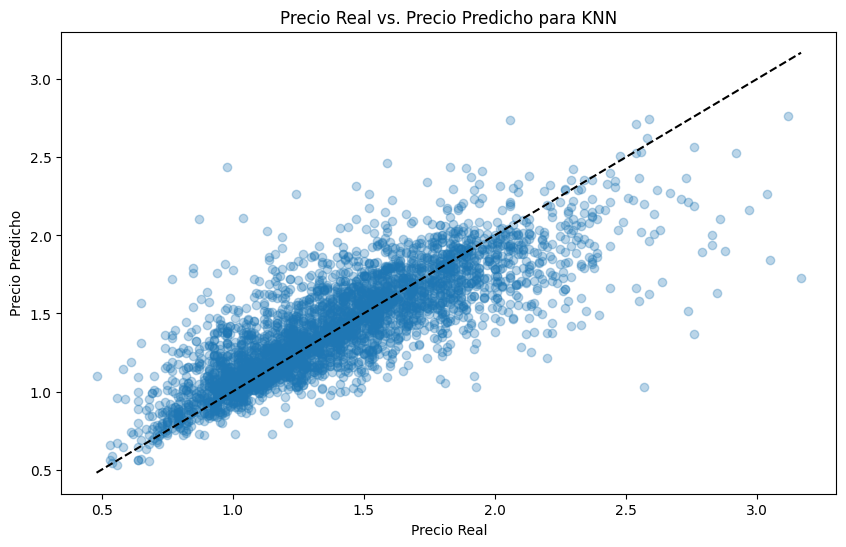

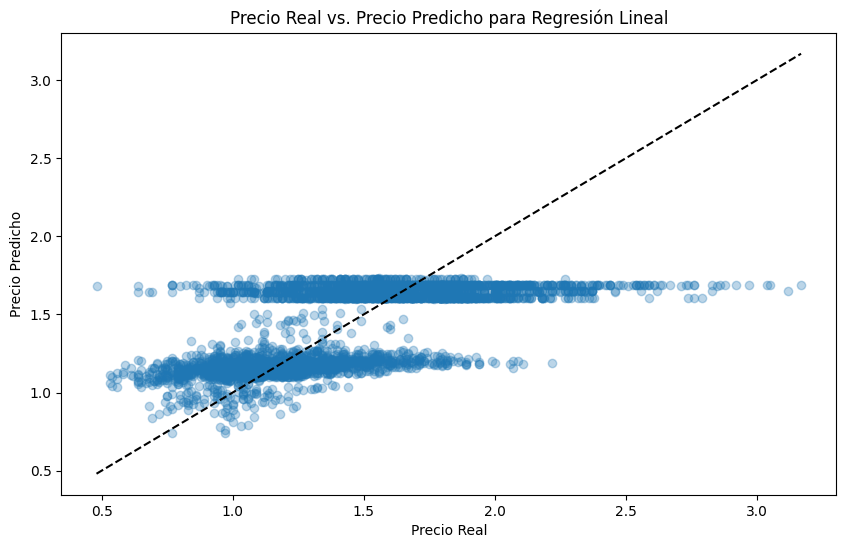

In [12]:
# Discusión sobre la comparación de errores
if mse_knn < mse_linear:
    print("El modelo KNN tiene un MSE menor que el modelo de Regresión Lineal, lo que indica que KNN está ajustando mejor los datos en este caso.")
else:
    print("El modelo de Regresión Lineal tiene un MSE menor que el modelo KNN, lo que indica que la Regresión Lineal está ajustando mejor los datos en este caso.")

if mae_knn < mae_linear:
    print("El modelo KNN tiene un MAE menor que el modelo de Regresión Lineal, lo que sugiere que, en promedio, las predicciones de KNN están más cerca de los valores reales.")
else:
    print("El modelo de Regresión Lineal tiene un MAE menor que el modelo KNN, lo que sugiere que, en promedio, las predicciones de Regresión Lineal están más cerca de los valores reales.")

# Función para graficar valores predichos vs valores reales
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.axis('tight')
    plt.xlabel('Precio Real')
    plt.ylabel('Precio Predicho')
    plt.title(title)

# Graficar valores predichos vs valores reales para KNN
plot_predictions(y_test, y_pred, 'Precio Real vs. Precio Predicho para KNN')

# Graficar valores predichos vs valores reales para Regresión Lineal
plot_predictions(y_test, y_pred_linear, 'Precio Real vs. Precio Predicho para Regresión Lineal')

plt.show()

**ANÁLISIS**

**Parte 1: Comparación de Métricas de Error para KNN**

Se implementó un modelo KNN y se evaluó su rendimiento utilizando las siguientes métricas de error:

1. **Error Cuadrático Medio (MSE):** El MSE para el modelo KNN es de aproximadamente 0.0560. Este valor indica que las predicciones del modelo KNN tienen en promedio un error cuadrático medio de 0.0560 con respecto a los valores reales. Un MSE más bajo sugiere que el modelo KNN se ajusta mejor a los datos en comparación con un modelo que tenga un MSE más alto.

2. **Error Absoluto Medio (MAE):** El MAE fue de aproximadamente 0.1657. Esta métrica nos da una medida de la magnitud promedio de los errores sin considerar su dirección. El MAE más bajo en comparación con el MSE sugiere que, en general, el modelo KNN tiende a cometer errores de predicción más pequeños.

El modelo KNN muestra un rendimiento sólido con un bajo MSE y MAE, lo que indica que se ajusta bien a los datos y tiende a hacer predicciones precisas en términos de magnitud y dirección.

**Parte 2: Comparación de Métricas de Error para Regresión Lineal**

Utilizando el mismo conjunto de datos, se entrenó un modelo de Regresión Lineal y se compararon las métricas de error con las del modelo KNN:

1. **MSE de Regresión Lineal:** El valor fue de aproximadamente 0.0955, que es mayor que el MSE del modelo KNN. Esto sugiere que el modelo de Regresión Lineal tiene errores de predicción más grandes en promedio que el modelo KNN. Un MSE más alto indica una peor adaptación a los datos.

2. **MAE de Regresión Lineal:** Con un valor aproximado de 0.2371, el MAE también es más alto para la Regresión Lineal que para el KNN. Esto indica que las predicciones del modelo de Regresión Lineal están, en promedio, más alejadas de los valores reales en comparación con el KNN.

Los resultados confirman que el modelo KNN  proporciona un ajuste más cercano a los datos reales que el modelo de Regresión Lineal. El KNN tiene un MSE y un MAE más bajos, lo que sugiere que es capaz de adaptarse mejor a la complejidad y las relaciones no lineales en el conjunto de datos. Por otro lado, la Regresión Lineal muestra un rendimiento inferior en este caso particular, ya que asume una relación lineal que puede no ser adecuada para la naturaleza de los datos.

**PREGUNTA 3**

In [13]:
#Pregunta 3
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Escalar los datos antes de aplicar algoritmos de clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2)  # 2 clústeres
gmm.fit(X_train_scaled)
labels_gmm = gmm.predict(X_test_scaled)

# Mean-Shift
meanshift = MeanShift(bandwidth=2)
meanshift.fit(X_train_scaled)
labels_meanshift = meanshift.predict(X_test_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train_scaled)
labels_dbscan_train = dbscan.labels_
labels_dbscan_test = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_test_scaled)
mask_test = labels_dbscan_test != -1

# ¿DBSCAN ha encontrado algún clúster?
if np.sum(mask_test) == 0:
    print("No se pueden calcular las métricas porque DBSCAN no encontró clústeres, solo ruido.")
    score_dbscan = None
else:
    score_dbscan = silhouette_score(X_test_scaled[mask_test], labels_dbscan_test[mask_test])

# Evaluación utilizando Silhouette Score
score_gmm = silhouette_score(X_test_scaled, labels_gmm)
score_meanshift = silhouette_score(X_test_scaled, labels_meanshift, metric='euclidean')

print(f"Silhouette Score para GMM: {score_gmm}")
print(f"Silhouette Score para Mean-Shift: {score_meanshift}")
if score_dbscan is not None:
    print(f"Silhouette Score para DBSCAN: {score_dbscan}")

Silhouette Score para GMM: 0.3816391398404678
Silhouette Score para Mean-Shift: 0.5520873783048363
Silhouette Score para DBSCAN: 0.7830794816612293


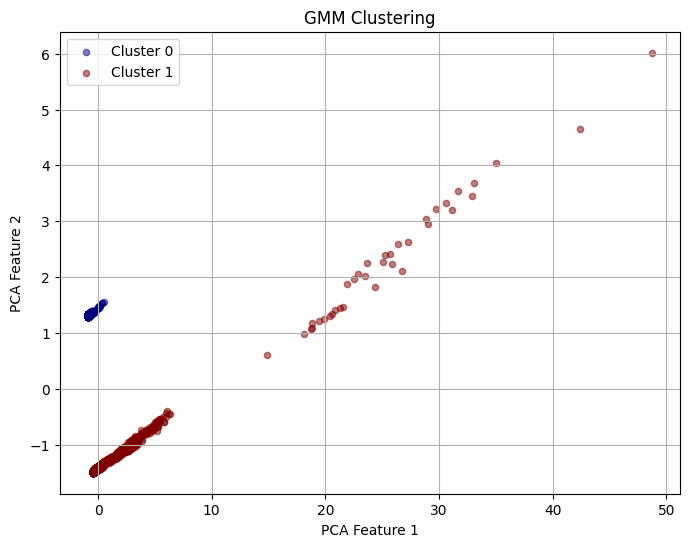

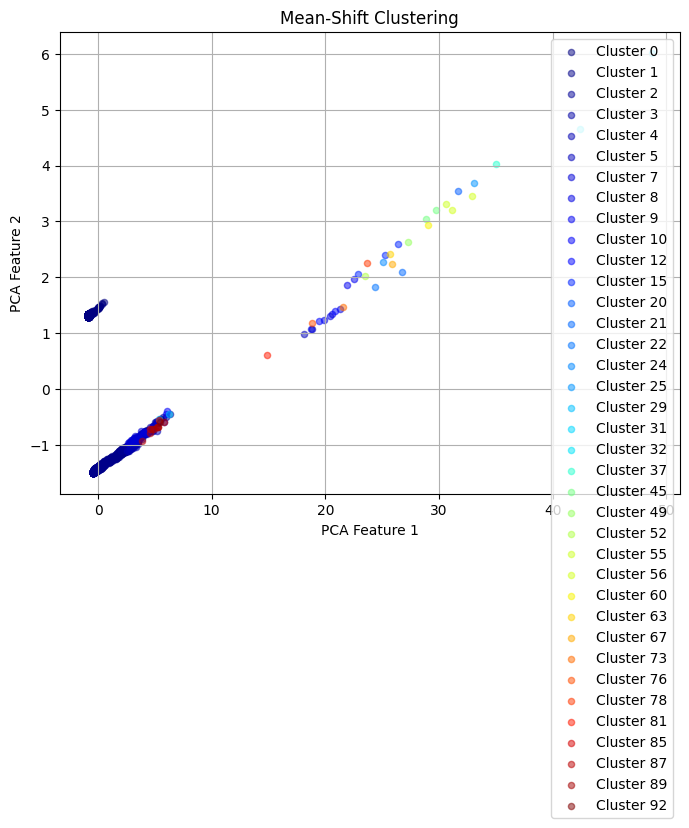

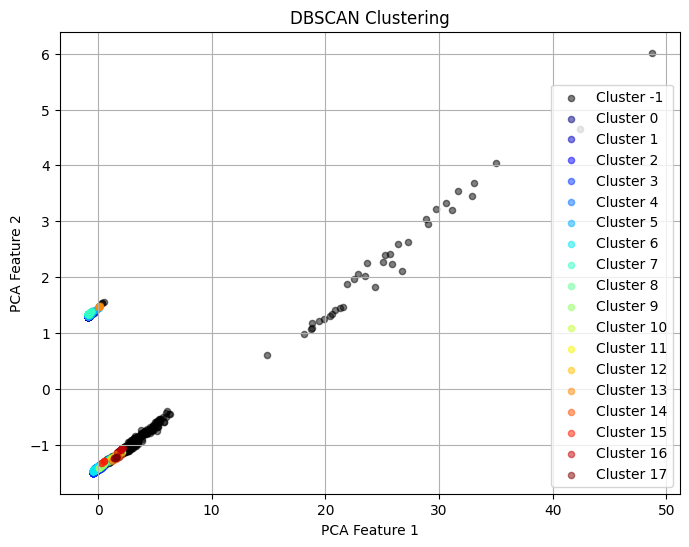

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para realizar PCA y graficar los resultados del clustering
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)

    for label in unique_labels:
        if label == -1:  # Para el ruido en DBSCAN
            color = 'k'
        else:
            color = plt.cm.jet(float(label) / max(unique_labels))
        cluster_data = reduced_data[labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=20, color=color, label=f'Cluster {label}', alpha=0.5)

    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar los clústeres para cada algoritmo
plot_clusters(X_test_scaled, labels_gmm, 'GMM Clustering')
plot_clusters(X_test_scaled, labels_meanshift, 'Mean-Shift Clustering')
plot_clusters(X_test_scaled, labels_dbscan_test, 'DBSCAN Clustering')


La puntuación de Silhouette es una medida que indica cuán similar es un objeto a su propio grupo en comparación con otros grupos. Un valor alto de Silhouette sugiere que el objeto está bien emparejado con su propio grupo y mal emparejado con los grupos vecinos. Analicemos las puntuaciones de Silhouette obtenidas para los diferentes algoritmos de clustering:

Análisis de Algoritmos de Clustering y sus Resultados:

1. **GMM (Gaussian Mixture Model):**

*   Puntuación de Silhouette: 0.3816
*   GMM es un enfoque probabilístico que asume que los datos provienen de múltiples distribuciones gaussianas. La puntuación de Silhouette de 0.3816 sugiere que GMM ha identificado dos agrupaciones principales, pero con una variabilidad interna significativa. Esto indica que los clusters formados por GMM pueden ser menos cohesivos y más dispersos.



2. **Mean-Shift:**

* Puntuación de Silhouette: 0.5521
* Mean-Shift es un algoritmo que no presupone una distribución específica de los datos y puede adaptarse a la densidad local de los puntos. La puntuación de Silhouette de 0.5521 sugiere que Mean-Shift ha identificado varios grupos, pero podría haber una posible sobre-segmentación de los datos debido a una selección inadecuada del parámetro de ancho de banda.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

* Puntuación de Silhouette: 0.7831
* DBSCAN es eficaz para identificar clusters con formas arbitrarias y aislar puntos de ruido. Con la puntuación de Silhouette más alta de 0.7831, indica que ha formado clusters densos y bien definidos, excluyendo eficazmente los puntos de ruido marcados con '-1'.

Según las puntuaciones de Silhouette, DBSCAN ha proporcionado los resultados más sólidos, identificando clusters densos y bien definidos. Mean-Shift también ha tenido un buen desempeño, pero puede requerir ajustes para evitar la sobre-segmentación. Por otro lado, GMM ha mostrado una menor cohesión en sus clusters.

Es importante destacar que la elección del algoritmo de clustering adecuado depende de la naturaleza de los datos y los objetivos del análisis. DBSCAN es una opción sólida para datos con clusters de formas irregulares y presencia de ruido, mientras que Mean-Shift puede ser útil para adaptarse a la densidad local de los puntos, pero necesita una afinación cuidadosa de parámetros. GMM es más apropiado cuando se presupone que los datos provienen de distribuciones gaussianas subyacentes. Cada algoritmo tiene sus ventajas y desventajas, y la elección debe basarse en la comprensión de los datos y los objetivos del análisis.